# 1. Load everything required

In [1]:
import numpy as np
import pandas as pd
from pycoingecko import CoinGeckoAPI
import os
import panel as pn
pn.extension('plotly')
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import inquirer
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import hvplot.pandas

import requests
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
style.use('ggplot')

C:\Users\josep\anaconda3\envs\uncc\lib\site-packages\blessed\terminal.py:188: UserWarning: Failed to setupterm(kind='xterm-color'): Could not find terminal xterm-color
  warnings.warn(msg)


# 2. Data Gathering for SNJ Index from Yahoo! Data
### Setting the dates, getting the crpto index values, creating the portfolio data, testing data returned

In [3]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 4, 8) 

btc_p = web.DataReader('BTC-USD', 'yahoo', start, end) ['Close']
eth_p = web.DataReader('ETH-USD', 'yahoo', start, end) ['Close']
ltc_p = web.DataReader('LTC-USD', 'yahoo', start, end) ['Close']
link_p = web.DataReader('LINK-USD', 'yahoo', start, end) ['Close']
xrp_p = web.DataReader('XRP-USD', 'yahoo', start, end) ['Close']
trx_p = web.DataReader('TRX-USD', 'yahoo', start, end) ['Close']

# 3. Charting the SNJ Cryptos
### Using Yahoo! data to build charts for dashboad

In [64]:
#1. choose+crypto will be to ONLY take 1 crypto AND get current price
#2. apply results of sim aggregate "AVG Daily Pct.Change" * that price
#Choose_crypto = input()
prices = ((btc_p.pct_change()+eth_p.pct_change()+ltc_p.pct_change()+link_p.pct_change()+xrp_p.pct_change()+trx_p.pct_change())/6).round(4)
prices_4 = (btc_p + eth_p + ltc_p + xrp_p)
prices_test = ((btc_p + eth_p + ltc_p + xrp_p)/4)
#prices = abs(price2/6
#prices = xrp_p
combined_df=['btc_p', 'eth_p',  'ltc_p', 'xrp_p']
prices_5 = [btc_p, eth_p,  ltc_p, xrp_p]
returns = prices.pct_change()

#Crypto price history charts
btc_price = btc_p.hvplot.line('Bitcoin Average Close for day', label='BTC Price History', legend = True)
eth_price = eth_p.hvplot.line('Ethereum Average Close for day', label='ETH Prices', legend = True)
ltc_price = ltc_p.hvplot.line('Litecoin Average Close for day', label='LTC Prices', legend = True)
link_price = link_p.hvplot.line('Chainlink Average Close for day', label='LINK Prices', legend = True)
xrp_price = xrp_p.hvplot.line('Ripple Average Close for day', label='XRP Prices', legend = True)
trx_price = trx_p.hvplot.line('Tron Average Close for day', label='TRX Prices', legend = True)

# Crypto percent change charts
btc_percent= btc_p.pct_change().hvplot.line(title='Bitcoin Daily % Change',ylabel='The average % daily change', legend = True).opts(width=600, )
eth_percent= eth_p.pct_change().hvplot.line(title='Ethereum Daily % Change',ylabel='The average % daily change', legend = True).opts(width=600, )
ltc_percent= ltc_p.pct_change().hvplot.line(title='Ethereum Daily % Change',ylabel='The average % daily change', legend = True).opts(width=600, )
link_percent= link_p.pct_change().hvplot.line(title='Ethereum Daily % Change',ylabel='The average % daily change', legend = True).opts(width=600, )
xrp_percent= xrp_p.pct_change().hvplot.line(title='Ethereum Daily % Change',ylabel='The average % daily change', legend = True).opts(width=600, )
trx_percent= trx_p.pct_change().hvplot.line(title='Ethereum Daily % Change',ylabel='The average % daily change', legend = True).opts(width=600, )

#Test chart load
btc_percent


:Curve   [Date]   (Close)

# 3.b. Building Data from Coingecko Data

In [9]:
#Loading CG API
cg = CoinGeckoAPI("https://api.coingecko.com/api/v3/")
#Test CG API
cg

In [10]:
# Testing CG data
cg.get_price(ids=['bitcoin', 'litecoin', 'ethereum', 'theta-token', 'vechain', 'chainlink'], vs_currencies='usd', history=90, days='365')

{'bitcoin': {'usd': 61566},
 'chainlink': {'usd': 42.38},
 'litecoin': {'usd': 312.99},
 'vechain': {'usd': 0.235597},
 'ethereum': {'usd': 2446.03},
 'theta-token': {'usd': 13.95}}

In [17]:
# Building CG Dataframes for charting
gecko_list = [
    "bitcoin",
    "ethereum",
    "litecoin",  
    #"chainlink",
    "ripple",
    #"tron",
]
############################
#df_cyptocurrency = pd.concat(frame_list,axis=1).sort_index()
#df_cyptocurrency 

#3 year period
timePeriod =493 

data = {}
for coin in gecko_list:
    try:
        nested_lists = cg.get_coin_market_chart_by_id(
            id=coin, vs_currency="usd", days=timePeriod
        )["prices"]
        data[coin] = {}
        data[coin]["timestamps"], data[coin]["values"] = zip(*nested_lists)

    except Exception as e:
        print(e)
        print("coin: " + coin)

frame_list = [
    pd.DataFrame(data[coin]["values"], index=data[coin]["timestamps"], columns=[coin])
    for coin in gecko_list
    if coin in data
]

df_cyptocurrency = pd.concat(frame_list,axis=1).sort_index()
df_cyptocurrency 

###################################
df_cyptocurrency["datetime"] = pd.to_datetime(df_cyptocurrency.index, unit="ms")
df_cyptocurrency["date"] = df_cyptocurrency["datetime"].dt.date
df_cyptocurrency["hour"] = df_cyptocurrency["datetime"].dt.hour

####################################

df_cyptocurrency = df_cyptocurrency.melt(
    id_vars=["datetime", "date", "hour"], var_name="currency_name", ignore_index=True
)
#Test dataframe
df_cyptocurrency

,datetime,date,hour,currency_name,value
0,2019-12-12 00:00:00,2019-12-12,0,bitcoin,7197.426826
1,2019-12-13 00:00:00,2019-12-13,0,bitcoin,7200.707018
2,2019-12-14 00:00:00,2019-12-14,0,bitcoin,7247.350277
3,2019-12-15 00:00:00,2019-12-15,0,bitcoin,7081.740255
4,2019-12-16 00:00:00,2019-12-16,0,bitcoin,7108.563022
...,...,...,...,...,...
1979,2021-04-16 00:00:00,2021-04-16,0,ripple,1.757091
1980,2021-04-17 00:06:44,2021-04-17,0,ripple,NaN
1981,2021-04-17 00:06:52,2021-04-17,0,ripple,NaN
1982,2021-04-17 00:08:56,2021-04-17,0,ripple,NaN


In [18]:
#Rename column names for charts
#We want the names to display a little better

new_df_cyptocurrency = pd.DataFrame(df_cyptocurrency)
print("\Before modifying name column:\n", df_cyptocurrency.columns)
new_df_cyptocurrency.rename(columns = {'currency_name' : 'Crypto Name'}, inplace = True)
print("\nAfter modifying name column:\n", new_df_cyptocurrency.columns)

\Before modifying name column:
 Index(['datetime', 'date', 'hour', 'currency_name', 'value'], dtype='object')

After modifying name column:
 Index(['datetime', 'date', 'hour', 'Crypto Name', 'value'], dtype='object')


In [19]:
#Charting cryptos with CG data
crypto_index_chart=df_cyptocurrency.hvplot.line('datetime','value', groupby='Crypto Name', title = 'Crypto Price History: 493 Days')
crypto_index_chart

:DynamicMap   [Crypto Name]
   :Curve   [datetime]   (value)

# 4. SNJ Headed to Monte Carlo

In [20]:
import fix_yahoo_finance as yf

df2 = yf.download("BTC-USD ETH-USD LTC-USD LINK-USD XRP-USD TRX-USD", start="2020-01-01", end="2021-04-08",group_by="close")
#print(df2)
#print(df2.BTC-USD)
df2.pct_change().head(100).dropna()

[*********************100%***********************]  6 of 6 downloaded


BTC-USD                                                    \
                Open      High       Low     Close Adj Close    Volume   
Date                                                                     
2020-01-02  0.001065 -0.005813 -0.033404 -0.029819 -0.029819  0.120460   
2020-01-03 -0.030284  0.027947 -0.002923  0.051451  0.051451  0.351378   
2020-01-04  0.051679  0.001844  0.057051  0.008956  0.008956 -0.343888   
2020-01-05  0.008859  0.015767  0.012454  0.000089  0.000089  0.069442   
2020-01-06  0.000000  0.031463  0.001182  0.048291  0.048291  0.180034   
...              ...       ...       ...       ...       ...       ...   
2020-04-05  0.018426  0.000648  0.002905 -0.011125 -0.011125 -0.110757   
2020-04-06 -0.010855  0.056421  0.009970  0.070776  0.070776  0.589165   
2020-04-07  0.071536  0.021475  0.052164 -0.013115 -0.013115 -0.056580   
2020-04-08 -0.012973 -0.009655  0.002326  0.021973  0.021973 -0.150988   
2020-04-09  0.022104 -0.002008  0.003604 -0.004365 -0.004365 -0.073160   

             ETH-USD                                ...   TRX-USD            \
                Open      High       Low     Close  ...       Low     Close   
Date                                                ...                       
2020-01-02  0.009180 -0.015206 -0.017415 -0.025917  ... -0.030303 -0.022727   
2020-01-03 -0.026066  0.028512 -0.003623  0.053057  ...  0.000000  0.038760   
2020-01-04  0.053057  0.011148  0.051783  0.006708  ...  0.039062  0.007463   
2020-01-05  0.006708  0.024697  0.015108  0.008958  ...  0.015038  0.007407   
2020-01-06  0.009180  0.035292  0.007627  0.058849  ...  0.007407  0.066176   
...              ...       ...       ...       ...  ...       ...       ...   
2020-04-05  0.021375  0.005159  0.014131 -0.011500  ...  0.008475  0.050000   
2020-04-06 -0.011359  0.158352  0.010134  0.178265  ...  0.058824  0.087302   
2020-04-07  0.177843  0.035033  0.143932 -0.023886  ...  0.047619 -0.029197   
2020-04-08 -0.023116 -0.011358  0.001766  0.045669  ...  0.000000  0.030075   
2020-04-09  0.045510 -0.001790  0.021278 -0.010600  ...  0.007576 -0.014599   

                                 XRP-USD                                \
           Adj Close    Volume      Open      High       Low     Close   
Date                                                                     
2020-01-02 -0.022727  0.023180 -0.001037 -0.007716 -0.027069 -0.024390   
2020-01-03  0.038760  0.109617 -0.024909  0.006221 -0.005886  0.029255   
2020-01-04  0.007463 -0.105998  0.029803  0.003091  0.032293  0.004651   
2020-01-05  0.007407  0.088442  0.004651  0.023112  0.010949  0.005658   
2020-01-06  0.066176  0.115687  0.005658  0.123494  0.006189  0.132992   
...              ...       ...       ...       ...       ...       ...   
2020-04-05  0.050000  0.121847  0.012249 -0.001646 -0.005609 -0.012658   
2020-04-06  0.087302  0.115287 -0.012101  0.076374  0.011844  0.089744   
2020-04-07 -0.029197 -0.072242  0.089644  0.040837  0.065775 -0.017391   
2020-04-08  0.030075  0.150472 -0.018396 -0.012751  0.001046  0.045809   
2020-04-09 -0.014599 -0.090616  0.046330  0.000000  0.023511 -0.012942   

                                
           Adj Close    Volume  
Date                            
2020-01-02 -0.024390  0.042470  
2020-01-03  0.029255  0.170144  
2020-01-04  0.004651 -0.213135  
2020-01-05  0.005658  0.168849  
2020-01-06  0.132992  0.970502  
...              ...       ...  
2020-04-05 -0.012658 -0.074062  
2020-04-06  0.089744  0.523104  
2020-04-07 -0.017391  0.038073  
2020-04-08  0.045809 -0.203762  
2020-04-09 -0.012942 -0.101583  

[99 rows x 36 columns]

In [21]:
last_price = prices[-2]
last_price

0.0747

In [28]:
#number of sims
number_simulations = 500
number_days = 493

In [29]:
#set df for simulation
simulation_df = pd.DataFrame()

In [30]:
#set values for monte carlo simulation

for x in range (number_simulations):
    count = 0
    daily_volatility = prices.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_volatility))
    price_series.append(price)
    
    for y in range(number_days):
        if count == 492:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_volatility))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series       

In [31]:
#Simulation outcome
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.075735,0.072423,0.078290,0.076261,0.074682,0.081876,0.076725,0.077980,0.081382,0.071597,...,0.075223,0.077629,0.077711,0.071563,0.077049,0.073436,0.075072,0.076280,0.076693,0.075016
1,0.078155,0.067972,0.085591,0.079743,0.074794,0.079978,0.072294,0.075104,0.075712,0.068269,...,0.076549,0.073481,0.074263,0.074311,0.074865,0.067700,0.079019,0.075353,0.072181,0.077764
2,0.078536,0.071764,0.086940,0.073780,0.076169,0.071101,0.070119,0.071369,0.084318,0.070585,...,0.075915,0.073436,0.072567,0.074135,0.069496,0.066354,0.072298,0.075343,0.069181,0.081726
3,0.080752,0.071103,0.086018,0.072047,0.079784,0.073410,0.073265,0.068705,0.083641,0.073351,...,0.083456,0.073361,0.071000,0.075360,0.068572,0.069033,0.074877,0.075664,0.066761,0.083333
4,0.077415,0.064667,0.075849,0.069847,0.073858,0.068966,0.076731,0.063279,0.078280,0.071350,...,0.085834,0.073023,0.071057,0.077346,0.067811,0.058704,0.071568,0.070697,0.068759,0.082279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.030243,0.136570,0.013720,0.283170,0.017966,0.020225,0.034063,0.033438,0.191899,0.095150,...,0.049150,0.028757,0.074133,0.054889,0.063528,0.024919,0.106658,0.005641,0.017112,0.008442
489,0.028198,0.128710,0.013998,0.287429,0.016500,0.021668,0.030920,0.034874,0.197828,0.099549,...,0.051495,0.027197,0.072256,0.058319,0.065348,0.024803,0.104312,0.005264,0.017142,0.007637
490,0.027519,0.120572,0.013665,0.304181,0.015840,0.022614,0.030505,0.033851,0.187504,0.095366,...,0.048083,0.027610,0.075052,0.062714,0.069355,0.025814,0.114704,0.005046,0.017323,0.006844
491,0.027653,0.114701,0.013695,0.318616,0.015705,0.020709,0.030779,0.034932,0.192982,0.096760,...,0.047984,0.025535,0.076972,0.064183,0.068034,0.025651,0.114581,0.005267,0.017465,0.006120


# 5. SNJ Index Simulation Outcomes

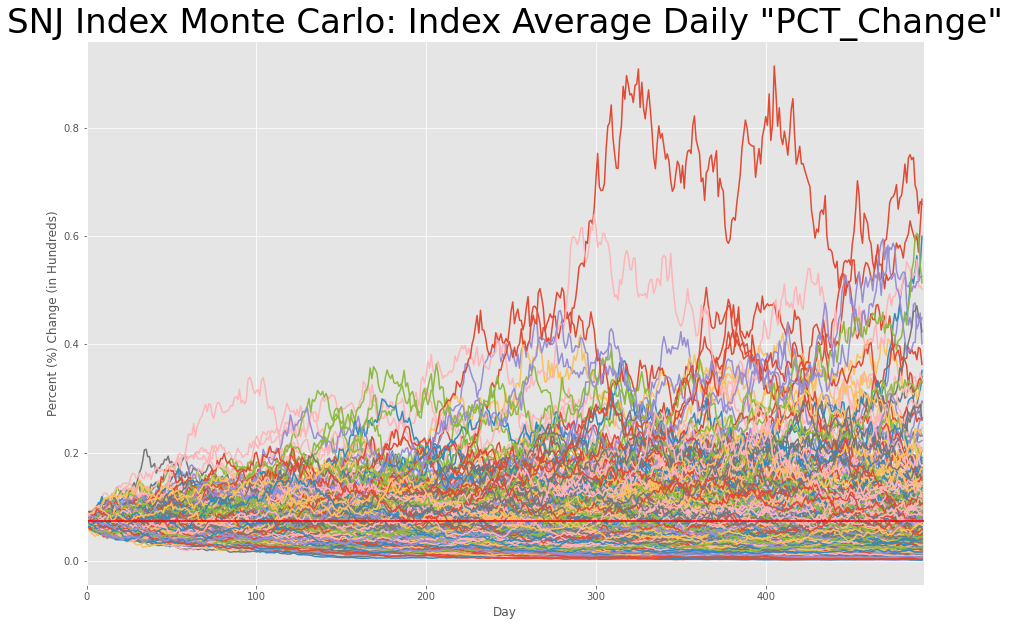

In [34]:
# SNJ Index Monte Carlo Plot

fig_index_monte = plt.figure(figsize=(15,10))
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.title('SNJ Index Monte Carlo: Index Average Daily "PCT_Change"', fontsize = 34)
plt.xlabel('Day')
plt.xlim(0, 493)
plt.ylabel('Percent (%) Change (in Hundreds)')
#plt.ylim(1500, )
plt.show()

In [36]:
#Getting SNJ index Average EOY values
annual_values = (simulation_df).iloc[492].sort_values(ascending = False).round(4)
annual_values

14     0.6676
301    0.6586
295    0.5995
401    0.5255
418    0.5137
        ...  
316    0.0033
305    0.0033
387    0.0030
156    0.0026
470    0.0023
Name: 492, Length: 500, dtype: float64

In [37]:
#Get the Index values range; mean, median, max, min
#mean_round = round(annual_values.mean,2)

print(f'The Crypto Index Average Price % Change the Next 365 Days is {100*(annual_values.mean())} %')
print(f'The Crypto Index Median Price % Change the Next 365 Days is {100*(annual_values.median())} %')
print(f'The Crypto Index MAXIMUM Price % Change the Next 365 Days is {100*(annual_values.max())} %')
print(f'The Crypto Index LOWEST Price % Change the Next 365 Days is {100*(annual_values.min())} %')

The Crypto Index Average Price % Change the Next 365 Days is 6.8692799999999945 %
The Crypto Index Median Price % Change the Next 365 Days is 3.75 %
The Crypto Index MAXIMUM Price % Change the Next 365 Days is 66.75999999999999 %
The Crypto Index LOWEST Price % Change the Next 365 Days is 0.22999999999999998 %


Text(0, 0.5, 'Deviation')

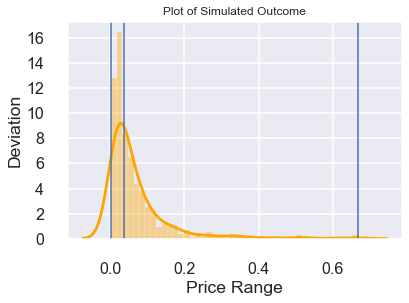

In [47]:
# Seaborn Chart
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

seabornInstance.distplot(annual_values, color='orange')
#seabornInstance.JointGrid(annual_values, color='orange')
#sns.set_theme()
#sns.boxplot(data=annual_values, palette="deep")
#sns.set_style("whitegrid")
#sns.despine(left=True)
sns.set_context("poster", font_scale=.5, rc={"lines.linewidth": 1.5})
plt.axvline(x=annual_values.median())
plt.axvline(x=annual_values.max())
plt.axvline(x=annual_values.min())
plt.title('Plot of Simulated Outcome')
plt.xlabel('Price Range')
#plt.xlim(.5, 1.3)
plt.ylabel('Deviation')

Text(0.5, 1.0, 'Swamplot of Simulated Outcome')

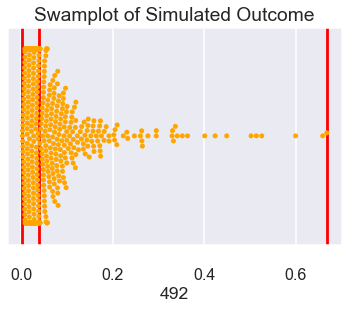

In [49]:
#Swarm plot of simulated SNJ data
import seaborn as seabornInstance
import seaborn as sns
plt.style.use('seaborn-poster')
%matplotlib inline

seabornInstance.swarmplot(annual_values, color='orange')

plt.axvline(x=annual_values.median(), color='red')
plt.axvline(x=annual_values.max(), color='red')
plt.axvline(x=annual_values.min(), color='red')
plt.title('Swamplot of Simulated Outcome')

# 6. Getting the New Cryptos in to Play
## Back to Monte Carlo and Beyond!

In [50]:
#testing values for getting additional cryptos from Yahoo finance
coti_p = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
ewt_p = web.DataReader('EWT-USD', 'yahoo', start, end) ['Close']
kda_p = web.DataReader('KDA-USD', 'yahoo', start, end) ['Close']

#cryto_choice = 
coti_p.pct_change().round(4)

Date
2020-01-01       NaN
2020-01-02   -0.0415
2020-01-03    0.0622
2020-01-04    0.1133
2020-01-05    0.0155
               ...  
2021-04-04   -0.0031
2021-04-05    0.1154
2021-04-06   -0.1540
2021-04-07    0.0392
2021-04-08    0.0028
Name: Close, Length: 437, dtype: float64

In [51]:
#get user input to create new_crypto variable
choice = input("Enter COTI, EWT or KDA: ")

if choice == 'COTI' :
    print("You chose COTI to project future performance") 
    #new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
elif choice == 'EWT' :
    print("You chose Energy Web to project future performance")
    #new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
elif choice == 'KDA' :
    print("You chose Kadena to project future performance")
    #new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
else:
    print("Invalid choice")

Enter COTI, EWT or KDA:  EWT


You chose Energy Web to project future performance


In [52]:
#assign value for new new_crypto_choice variable
if choice == 'COTI':
    new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
elif choice == 'EWT':
    new_crypto_choice = web.DataReader('EWT-USD', 'yahoo', start, end) ['Close']
elif choice == 'KDA':
    new_crypto_choice = web.DataReader('COTI-USD', 'yahoo', start, end) ['Close']
else:
    print("Invalid crypto choice provided")

In [53]:
new_crypto_choice
new_crypto_returns = new_crypto_choice.pct_change().round(4)
new_crypto_returns

Date
2020-03-29       NaN
2020-03-30   -0.2616
2020-03-31    0.2877
2020-04-01   -0.4562
2020-04-02    0.1484
               ...  
2021-04-04    0.0567
2021-04-05    0.0757
2021-04-06   -0.0470
2021-04-07    0.0580
2021-04-08   -0.0440
Name: Close, Length: 348, dtype: float64

# 5. NEW Simulation for New Crypto Values
### Back to Monte Carlo

In [73]:
#Make sure the required variables for the new crypto are avauilable
new_crypto_choice
new_crypto_returns = new_crypto_choice.pct_change().round(4)
new_crypto_returns
last_crpyto_price = new_crypto_returns[-1]

In [72]:
new_crypto_returns[-1]

-0.044

In [67]:
#Variable for new sim df
new_simulation_df = pd.DataFrame()

In [68]:
#Sim for the new crypto data
for x in range (number_simulations):
    count = 0
    daily_volatility_2 = new_crypto_choice.std()
    
    price_series_new = []
    
    price_new = last_crpyto_price * (1 + np.random.normal(0, daily_volatility_2))
    price_series_new.append(price)
    
    for y in range(number_days):
        if count == 462:
            break
        price_new = price_series_new[count] * (1 + np.random.normal(0, daily_volatility_2))
        price_series_new.append(price_new)
        count += 1
    
    new_simulation_df[x] = price_series_new     

In [69]:
new_simulation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.006777,0.006777,0.006777,0.006777,0.006777,0.006777,0.006777,0.006777,0.006777,0.006777,...,0.006777,0.006777,0.006777,0.006777,0.006777,0.006777,0.006777,0.006777,0.006777,0.006777
1,0.010437,0.012140,0.081382,0.019636,-0.019938,-0.023274,-0.015579,-0.029425,0.016893,-0.020213,...,-0.035432,-0.025876,0.022306,0.050261,0.030501,0.028099,0.029067,-0.063160,0.011185,0.002347
2,0.089679,-0.011488,-0.102272,0.101102,0.042917,-0.007754,0.080821,0.021262,-0.028935,0.079799,...,0.047258,0.034259,-0.006465,0.124558,-0.142609,-0.100136,0.190426,0.288561,0.029877,-0.002754
3,-0.530261,0.033536,-0.051558,0.503488,0.399721,-0.024231,0.075513,0.007997,0.114035,0.349598,...,0.090079,0.445377,-0.013374,0.030890,0.045376,0.308202,0.565817,1.705113,0.176933,0.002092
4,-5.241016,0.211571,-0.319372,1.262708,3.071154,-0.220692,0.839816,0.006587,-0.319042,1.828969,...,-0.188173,-0.114099,-0.091272,0.012785,-0.053281,0.808839,0.437323,11.184832,-0.066350,0.003398


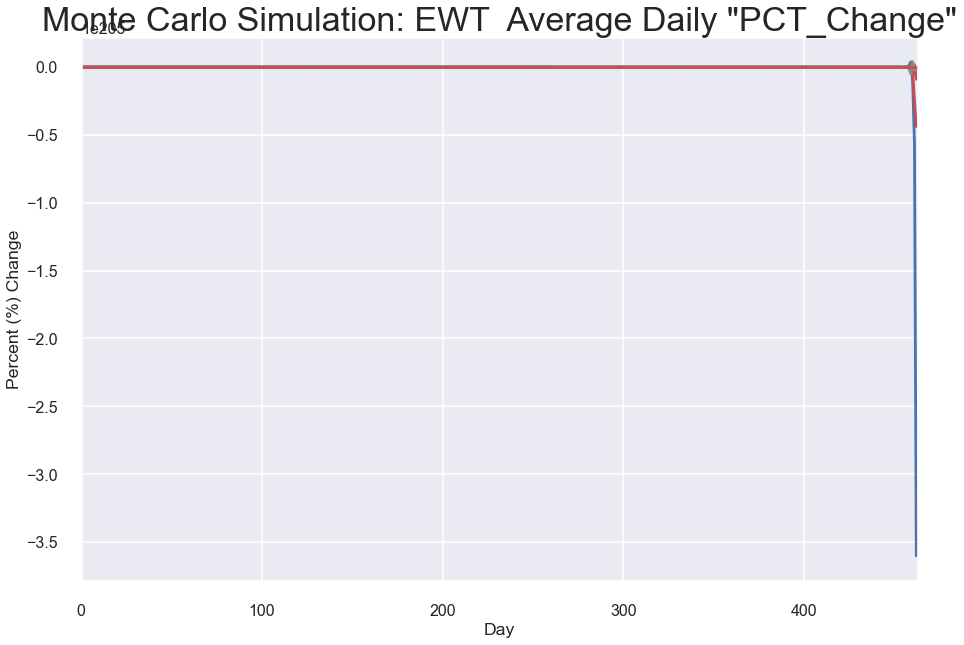

In [70]:
#Plot the Monte Carlo sim. and show for new crpyto
fig_new_monte = plt.figure(figsize=(15,10))
plt.plot(new_simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.title('Monte Carlo Simulation: '+ choice + '  Average Daily "PCT_Change"', fontsize = 34)
plt.xlabel('Day')
plt.xlim(0, 463)
plt.ylabel('Percent (%) Change')
#plt.ylim( )
plt.show()